<a href="https://colab.research.google.com/github/Jason2001167/CECS_456/blob/main/CECS_456.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the packages

In [2]:

!pip install Cython
!pip install hdbscan
!pip install kneed # To install only knee-detection algorithm
import hdbscan
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans # for KMeans algorithm
from kneed import KneeLocator # To find elbow point

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541505 sha256=f569e00145cbe2617f54be3795a2d0027215cdb7bfdd4abe60feab1f2a6295bd
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Reading/Gathering data from CSV file

In [5]:
data = pd.read_csv("SouthGermanCredit.csv")

Check first 5 rows

In [6]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


Identifty and Drop Outliers

In [ ]:
# Drop certain outliers
# Can do via percentaile prob around 90th percent tile and up


Create an Correlation matrix

In [ ]:
# Create matrix

# Possbily plot via seaborn?

Plot graphical distribuition


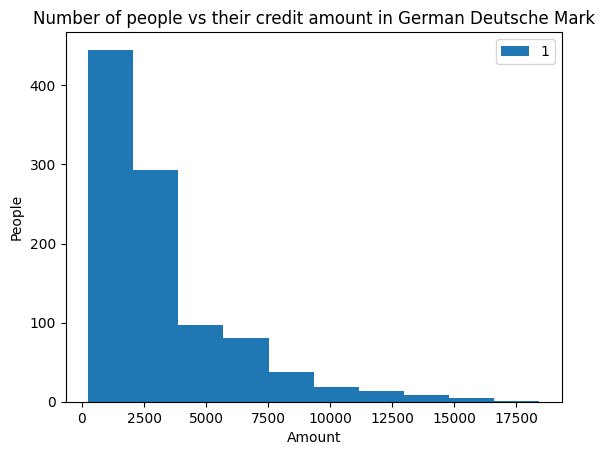

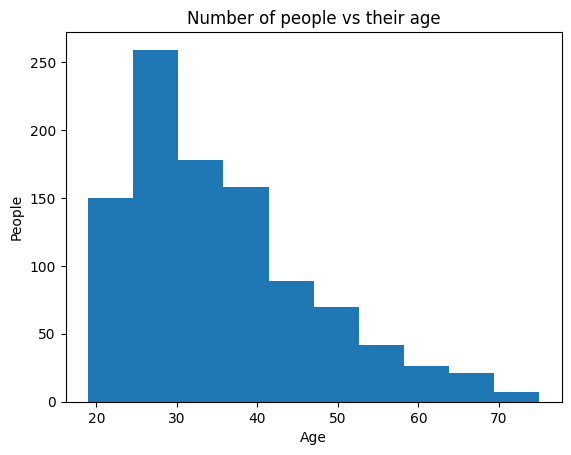

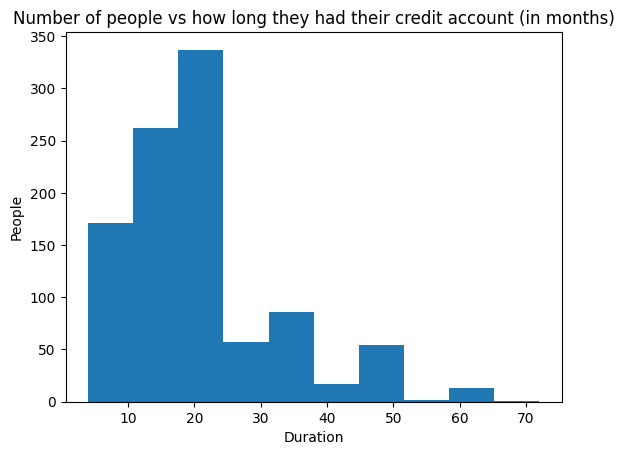

In [25]:
# basically plotting different repersentions of the data 
# Can use to repersent patterns in data for presentation

# Histogram of the credit amount
plt.hist(data["amount"],bins=10)
plt.xlabel("Amount")
plt.ylabel("People")
plt.title("Number of people vs their credit amount in German Deutsche Mark")
plt.legend("1 GDM = ")
plt.show()

# Histogram of Age
plt.hist(data["age"],bins=10)
plt.xlabel("Age")
plt.ylabel("People")
plt.title("Number of people vs their age")
plt.show()

# Histogram of Duration
plt.hist(data["duration"],bins=10)
plt.xlabel("Duration")
plt.ylabel("People")
plt.title("Number of people vs how long they had their credit account (in months)")
plt.show()

Calculate the sum of squared distances of each K

In [8]:
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
  kmeans.fit(data[['age','amount']])
  sse.append(kmeans.inertia_)

We are using the elbow method because our dataset is relatively compact and well-seperated. Since each row in the dataset represents a customer and the columns represent different features, we can safely cluster the customers based on their demographics. It is also reasonable that we can easily divide the customers into distinct, non-overlapping segments based on their individual demographics. This will allow us to find trends in our data and potentially identify correlations between the demographics of the customers and credit.

Plotting elbow curve

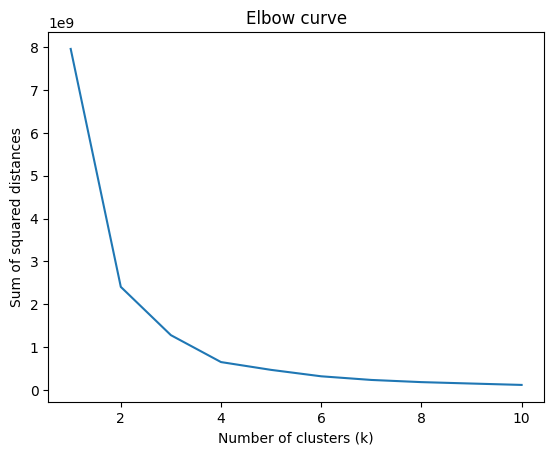

In [9]:
plt.plot(range(1,11),sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow curve')
plt.show()

Identifying elbow point of curve

In [ ]:
k1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(k1.elbow)

3


K - Means Clustering for Age Vs. credit amt


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


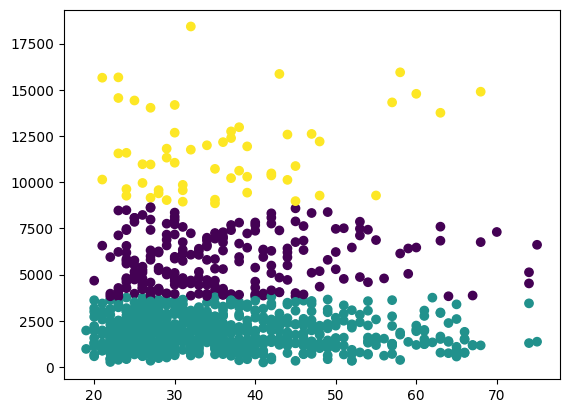

In [ ]:
k1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kmeans = KMeans(n_clusters=k1.elbow)
kmeans.fit((data[['age','amount']]))

plt.scatter(data['age'], data['amount'], c=kmeans.labels_)
plt.show()

Interpretation of K Means Clustering of Age vs Credit Amt:
Correlation: As the age of the customers increases the amount of credit decreases. The age group with the highest amount of credit is from the ages of 20-50.

K - Means Clustering for 

--------------------------------------------------------------------------------HDBSCAN--------------------------------------------------------

If code below says hdbscan package not found run following commands.

In [ ]:
!pip install Cython

!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 22.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541555 sha256=93ab87f3cd0ec4361708fadbc2dc602143d98ade0c63d2b51d7afc3cc3fe691d
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan


Code below basically helps get started by getting all the data together

In [ ]:

import hdbscan
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE





data = pd.read_csv("SouthGermanCredit.csv")

projection = TSNE().fit_transform(data)
clusterer = hdbscan.HDBSCAN()

clusterer.fit(data)


HDBSCAN()

Next set of code basically takes the data we current have from the South German Credit and puts it into a T-SNE graph. T-SNE helps us to visualize high-dimensional datasets (need to read up on specifics later on how it works) Currently coded such that each cluster created by HDBSCAN() will be displayed as a different color to neighboring clusters (there are repeating colors but if they aren't next to each other they are different clusters)

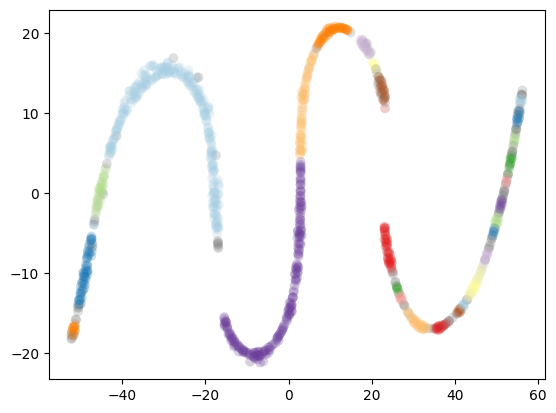

In [ ]:
color_palette = sns.color_palette('Paired', 28)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

Below is an array which basically shows which cluster each row in the dataset is contained within. Clusters are numbered from 0 - cluster.labels_.max(). If the number reads -1 then the data is considered noise and isn't a part of any of the clusters. cluster.labels_.max() when we don't add any parameters to HDBSCAN is 26 meaning there are 27 clusters.

In [ ]:
clusterer.labels_

array([24, 18, -1, 21, 21, 21, 20, 24, -1, 17, 17, 10, 21, -1, 21, 18, 17,
       19, 21, 13, -1, 19, 21, 24,  6,  6, 25, 24, 23,  6, 19, -1, 10, 24,
       21, 26, 24, 21, 20, 17, 26, 21, 24, 18, 24, 24, 24, 21, 24, 24, 25,
       17, 24, 21, 10,  7, -1, 24, 19, 19, 24, 18, -1,  2, 24, 24, 19, 21,
       24, 21, 18, 21, 21, 26, 20, 21, -1, 21, 24, 21, 21, 20, 11, 21, 24,
       23, 21,  6, 25, 21, 21, 19, -1, 24, 10,  6, 23,  6, 21, 12, 17, 25,
        6, 14, 21, 24, 24, 24, 24, 21, 17,  7, 21, 25, 17, 10, 21, 18, 26,
       19,  6, 11, 21, 24, 24,  5, 26, 19, 21, 18, 21, 21, 21, 24, 24, 24,
       24, 21, 26, 19, 17, 17,  5, 21, 21, 21, 19, 24, 24, 21,  7, 21,  3,
       22, 24, 18, 24, 12, 10, 23, 24, 24, 17, 20,  7, 21, 11,  6, 18, 24,
       11, 24, 24, 24, 21, 19, 15, 21, 21,  1, 24, 24, -1, 18, 24, 11, 21,
       20, 21, 18, 21, 17,  4, 21, 24, 13,  8, 21, 21, 23, 21,  9, 24,  9,
       17,  6, 24, 24,  1, 18, 24, 18, 21, -1, 24, 17, 18, 25,  2, 24, 21,
       23,  6, -1, 18, 24

In [ ]:
clusterer.labels_.max()

26

plots cluster given by HDBSCAN into a dendrogram in two different ways. First dendro gram is a single linkage tree. second is a condensed tree. TL;DR from what I understand so far is the more distance between any two clusters the less similarities there are between the two clusters. (for the second graph I set it up such that every red line you see is a cluster taken from HDBSCAN to make it slightly easier to read still don't fully understand it myself though)

<Axes: ylabel='distance'>

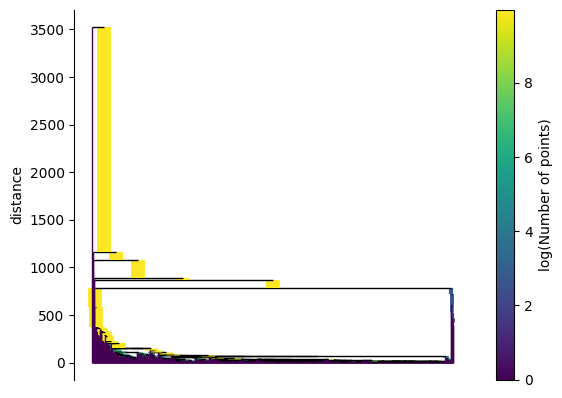

In [ ]:
clusterer.single_linkage_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

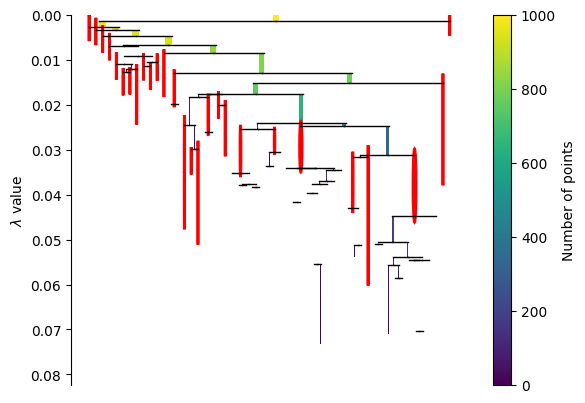

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))